# EDA


- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [2]:
!git clone https://github.com/CuHzQuixote/Midterm-Project

Cloning into 'Midterm-Project'...
remote: Enumerating objects: 233, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 233 (delta 205), reused 225 (delta 205), pack-reused 0 (from 0)
Receiving objects: 100% (233/233), 3.37 MiB | 6.20 MiB/s, done.
Resolving deltas: 100% (205/205), done.


In [ ]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags

## Data Importing

In [ ]:
# load one file first to see what type of data you're dealing with and what attributes it has

import json

# Path to your JSON file
file_path = "/Users/snoopy/GitHub/LHL-Project-3-Midterm-Project/data/AK_Juneau_0.json"

# Open and read the JSON file
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Print the entire JSON with indentation for readability
print(json.dumps(data, indent=4))

{
    "status": 200,
    "data": {
        "total": 8,
        "count": 8,
        "results": [
            {
                "primary_photo": {
                    "href": "https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m2867511255s-w1024_h768.jpg"
                },
                "last_update_date": "2023-09-19T20:52:50Z",
                "source": {
                    "plan_id": null,
                    "agents": [
                        {
                            "office_name": "EXP Realty LLC - Southeast Alaska"
                        },
                        {
                            "office_name": "Non-Member Office"
                        }
                    ],
                    "spec_id": null,
                    "type": "mls"
                },
                "tags": [
                    "carport",
                    "community_outdoor_space",
                    "cul_de_sac",
                    "family_room",
                    "hardwood_fl

In [ ]:
# loop over all files and put them into a dataframe

# Path to folder containing JSON files
folder_path = "/Users/snoopy/GitHub/LHL-Project-3-Midterm-Project/data"

# List to store all property data
all_properties = []

# Set to track unique keys (for structure verification)
schema_set = set()

# Function to safely extract values from nested dictionaries
def safe_get(d, keys, default=None):
    """Safely fetches a nested key from a dictionary."""
    for key in keys:
        if isinstance(d, dict):
            d = d.get(key, default)
        else:
            return default
    return d

# Function to flatten property data
def flatten_property(property_item):
    """Extracts relevant fields and flattens nested dictionaries."""
    if property_item is None:
        return {}

    return {
        "property_id": safe_get(property_item, ["property_id"]),
        "status": safe_get(property_item, ["status"]),
        "list_date": safe_get(property_item, ["list_date"]),
        "list_price": safe_get(property_item, ["list_price"]),
        "sold_date": safe_get(property_item, ["description", "sold_date"]),
        "sold_price": safe_get(property_item, ["description", "sold_price"]),
        "year_built": safe_get(property_item, ["description", "year_built"]),
        "beds": safe_get(property_item, ["description", "beds"]),
        "baths": safe_get(property_item, ["description", "baths"]),
        "sqft": safe_get(property_item, ["description", "sqft"]),
        "lot_sqft": safe_get(property_item, ["description", "lot_sqft"]),
        "garage": safe_get(property_item, ["description", "garage"]),
        "type": safe_get(property_item, ["description", "type"]),
        "address": safe_get(property_item, ["location", "address", "line"]),
        "city": safe_get(property_item, ["location", "address", "city"]),
        "state": safe_get(property_item, ["location", "address", "state"]),
        "postal_code": safe_get(property_item, ["location", "address", "postal_code"]),
        "latitude": safe_get(property_item, ["location", "address", "coordinate", "lat"]),
        "longitude": safe_get(property_item, ["location", "address", "coordinate", "lon"]),
        "primary_photo": safe_get(property_item, ["primary_photo", "href"]),
    }

# Loop through JSON files in folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".json"):  # Ensure it's a JSON file
        file_path = os.path.join(folder_path, file_name)

        with open(file_path, "r", encoding="utf-8") as f:
            try:
                data = json.load(f)
                if "data" in data and "results" in data["data"]:
                    for property_item in data["data"]["results"]:
                        flattened_data = flatten_property(property_item)
                        all_properties.append(flattened_data)
                        schema_set.add(frozenset(flattened_data.keys()))  # Store keys for consistency check

            except json.JSONDecodeError:
                print(f"Error reading {file_name}")

# Check for structural consistency
if len(schema_set) == 1:
    print("All files have the same structure.")
else:
    print("Files have different structures.")

# Convert to DataFrame
df = pd.DataFrame(all_properties)

# Display first few rows
print(df.head())


All files have the same structure.
  property_id status                    list_date  list_price   sold_date  \
0  3300959879   sold  2023-11-27T05:15:07.000000Z    334900.0  2024-01-16   
1  3149247078   sold  2023-11-23T11:38:45.000000Z    185000.0  2024-01-16   
2  4686076173   sold  2023-12-16T02:39:18.000000Z    197000.0  2024-01-12   
3  4085014275   sold  2023-10-24T14:15:02.000000Z    295000.0  2024-01-12   
4  3743385520   sold  2023-11-15T17:43:35.000000Z    105000.0  2024-01-12   

   sold_price  year_built  beds  baths    sqft  lot_sqft  garage  \
0    345000.0      2001.0   3.0    2.0  1539.0   22651.0     2.0   
1    196000.0      1900.0   3.0    NaN  2429.0    2614.0     3.0   
2    205000.0      1971.0   3.0    2.0  1120.0   13504.0     NaN   
3    295000.0      2013.0   3.0    3.0  2400.0    2688.0     1.0   
4    106000.0      1900.0   3.0    NaN  1478.0     871.0     NaN   

            type          address        city         state postal_code  \
0  single_family  

## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [ ]:
# Check data types and missing values
df.info()

# Summary statistics
df.describe(include="all")

# Check if any columns contain lists
df.applymap(lambda x: isinstance(x, list)).sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    8159 non-null   object 
 1   status         8159 non-null   object 
 2   list_date      7752 non-null   object 
 3   list_price     7721 non-null   float64
 4   sold_date      8159 non-null   object 
 5   sold_price     6716 non-null   float64
 6   year_built     7316 non-null   float64
 7   beds           7504 non-null   float64
 8   baths          7980 non-null   float64
 9   sqft           7323 non-null   float64
 10  lot_sqft       6991 non-null   float64
 11  garage         4448 non-null   float64
 12  type           8125 non-null   object 
 13  address        8144 non-null   object 
 14  city           8154 non-null   object 
 15  state          8159 non-null   object 
 16  postal_code    8159 non-null   object 
 17  latitude       7909 non-null   float64
 18  longitud

property_id      0
status           0
list_date        0
list_price       0
sold_date        0
sold_price       0
year_built       0
beds             0
baths            0
sqft             0
lot_sqft         0
garage           0
type             0
address          0
city             0
state            0
postal_code      0
latitude         0
longitude        0
primary_photo    0
dtype: int64

In [ ]:
# Drop rows where "sold_price", "lot_sqft", "year_built", "list_price","beds", "baths" or "sqft" is missing
df = df.dropna(subset=["sold_price", "lot_sqft", "year_built", "list_price","beds", "baths", "sqft"])

# Drop unnecessary columns
df = df.drop(columns=["primary_photo"], errors="ignore")

# Replace nulls with 0 for garage
df["garage"] = df["garage"].fillna(0)

# Replace nulls with 1 for baths
df["baths"] = df["baths"].fillna(0)

# Replace null values in 'address' with "Unknown"
df["address"] = df["address"].fillna("Unknown")

# Replace null values in 'latitude' with "Unknown"
df["latitude"] = df["latitude"].fillna("Unknown")

# Replace null values in 'longitude' with "Unknown"
df["longitude"] = df["longitude"].fillna("Unknown")

# Convert data types
df["sold_price"] = df["sold_price"].astype(float)
df["lot_sqft"] = pd.to_numeric(df["lot_sqft"], errors="coerce")
df["year_built"] = df["year_built"].astype(int)


df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5131 entries, 0 to 8158
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   property_id  5131 non-null   object 
 1   status       5131 non-null   object 
 2   list_date    5131 non-null   object 
 3   list_price   5131 non-null   float64
 4   sold_date    5131 non-null   object 
 5   sold_price   5131 non-null   float64
 6   year_built   5131 non-null   int64  
 7   beds         5131 non-null   float64
 8   baths        5131 non-null   float64
 9   sqft         5131 non-null   float64
 10  lot_sqft     5131 non-null   float64
 11  garage       5131 non-null   float64
 12  type         5131 non-null   object 
 13  address      5131 non-null   object 
 14  city         5126 non-null   object 
 15  state        5131 non-null   object 
 16  postal_code  5131 non-null   object 
 17  latitude     5131 non-null   object 
 18  longitude    5131 non-null   object 
dtypes: float64(

In [ ]:
#replacing NA cities with the nearest city by postal code

# Identify missing cities
missing_city_mask = df["city"].isna()

# Find the most common city for each postal code
city_lookup = df.groupby("postal_code")["city"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown")

# Fill missing cities using the lookup table
df.loc[missing_city_mask, "city"] = df.loc[missing_city_mask, "postal_code"].map(city_lookup)

# Ensure no remaining missing values in 'city'
df["city"] = df["city"].fillna("Unknown")

# Check updated values
print(df["city"].isna().sum())  # Should be 0 if all missing values were filled

0


In [ ]:
# Check for non-numeric values in columns that should be numeric
print(df["sold_price"].unique())  # Check for any unexpected non-numeric values
print(df["lot_sqft"].unique())    # Check for any unexpected non-numeric values
print(df["year_built"].unique())  # Check for any unexpected non-numeric values


[3.450000e+05 2.050000e+05 2.950000e+05 1.000000e+04 7.150000e+04
 1.000000e+05 2.080000e+05 3.460000e+05 2.199000e+05 1.950000e+05
 2.700000e+05 2.320000e+05 5.800000e+04 2.750000e+05 2.415000e+05
 3.500000e+05 1.070000e+05 2.370000e+05 3.050000e+05 2.290000e+05
 4.279000e+05 2.250000e+05 2.830000e+05 2.669000e+05 4.979000e+05
 2.600000e+05 2.299950e+05 7.031250e+05 4.650000e+05 2.300000e+05
 1.225000e+05 3.600000e+05 4.000000e+05 1.075000e+06 4.330000e+05
 8.100000e+05 5.990000e+05 7.770000e+05 4.600000e+05 6.250000e+05
 7.400000e+06 3.800000e+05 9.850000e+05 5.550000e+05 4.525000e+05
 4.100000e+05 5.800000e+05 3.700000e+05 4.500000e+05 7.000000e+05
 3.140000e+05 3.650000e+05 5.650000e+05 8.500000e+05 1.195000e+06
 4.300000e+05 8.950000e+05 6.000000e+05 5.200000e+05 5.500000e+05
 4.200000e+05 9.999990e+05 4.450000e+05 1.206000e+06 4.150000e+05
 2.000000e+05 3.599000e+05 1.860000e+05 6.750000e+05 1.701500e+06
 5.250000e+05 3.850000e+05 1.038712e+06 6.900000e+05 4.980000e+05
 5.000000e

In [ ]:
# Convert to numeric, coercing errors to NaN
df["sold_price"] = pd.to_numeric(df["sold_price"], errors="coerce")
df["lot_sqft"] = pd.to_numeric(df["lot_sqft"], errors="coerce")
df["year_built"] = pd.to_numeric(df["year_built"], errors="coerce")

# Option 1: Drop rows with NaN values in critical columns (e.g., sold_price)
df = df.dropna(subset=["sold_price", "lot_sqft", "year_built"])



In [ ]:
# Check for any remaining non-numeric values
print(df["sold_price"].dtype)  # Should be float64 now
print(df["lot_sqft"].dtype)    # Should be float64 now
print(df["year_built"].dtype)  # Should be int64 now


float64
float64
int64


### Dealing with Tags

Consider the fact that with tags, there are a lot of categorical variables.

 - How many columns would we have if we OHE tags, city and state?
 - Perhaps we can get rid of tags that have a low frequency.

In [ ]:
# OHE categorical variables/ tags here
# tags will have to be done manually
# One-Hot Encoding for 'city' and 'state' columns
df_encoded = pd.get_dummies(df, columns=["city", "state"], drop_first=True)

# Check the shape of the DataFrame to see how many new columns were added
print(f"Shape after OHE: {df_encoded.shape}")


Shape after OHE: (5131, 119)


In [ ]:
# Function to replace low-frequency categories with "Other"
def replace_low_frequency(df, column, min_freq=5):
    freq = df[column].value_counts()
    low_freq_categories = freq[freq < min_freq].index
    df[column] = df[column].apply(lambda x: x if x not in low_freq_categories else 'Other')
    return df

# Apply this function to city and state columns
df = replace_low_frequency(df, 'city')
df = replace_low_frequency(df, 'state')

# Apply OHE again after replacement
df_encoded = pd.get_dummies(df, columns=["city", "state"], drop_first=True)

# Check the shape of the DataFrame again
print(f"Shape after grouping and OHE: {df_encoded.shape}")


Shape after grouping and OHE: (5131, 111)


In [ ]:
# Print number of columns
print(f"Number of columns after encoding: {df_encoded.shape[1]}")


Number of columns after encoding: 111


### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

In [ ]:
# perform train test split here
from sklearn.model_selection import train_test_split

# 1. Split data into training & testing sets (80-20 split)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 2. Compute mean sale price per city and state using the training data
city_price_map = train_df.groupby("city")["sold_price"].mean()
state_price_map = train_df.groupby("state")["sold_price"].mean()

# Overall mean sale price (used for unseen cities/states in the test set)
overall_mean = train_df["sold_price"].mean()

# 3. Target encoding - Map mean sale price to cities and states in both train and test sets
train_df["city_encoded"] = train_df["city"].map(city_price_map).fillna(overall_mean)
test_df["city_encoded"] = test_df["city"].map(city_price_map).fillna(overall_mean)

train_df["state_encoded"] = train_df["state"].map(state_price_map).fillna(overall_mean)
test_df["state_encoded"] = test_df["state"].map(state_price_map).fillna(overall_mean)

# 4. Drop the original 'city' and 'state' columns
train_df = train_df.drop(columns=["city", "state"])
test_df = test_df.drop(columns=["city", "state"])

# Check the resulting encoding
print(train_df[["city_encoded", "state_encoded"]].head())


       city_encoded  state_encoded
5858  254083.518519  271590.032680
1355  254083.518519  271590.032680
6031  417332.585034  417332.585034
25    262106.388889  262106.388889
4829  317458.024691  317458.024691


## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [ ]:
# perform EDA here
# perform EDA here
import seaborn as sns
import matplotlib.pyplot as plt

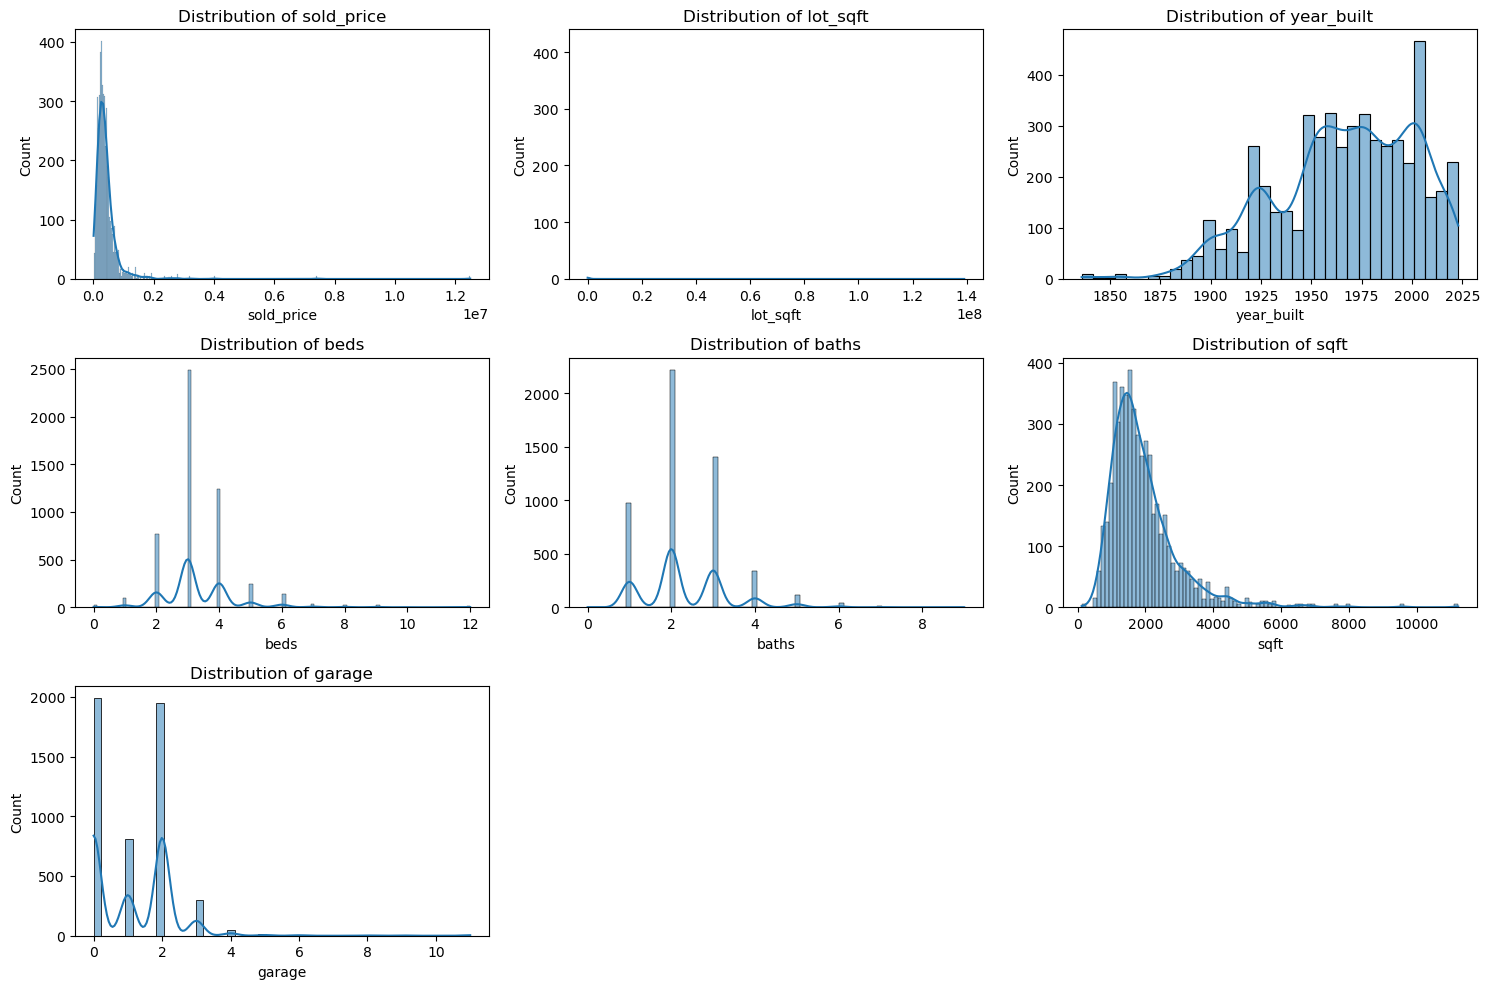

In [ ]:

# List of numerical columns to analyze
numerical_columns = ["sold_price", "lot_sqft", "year_built", "beds", "baths", "sqft", "garage"]

# Plot distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

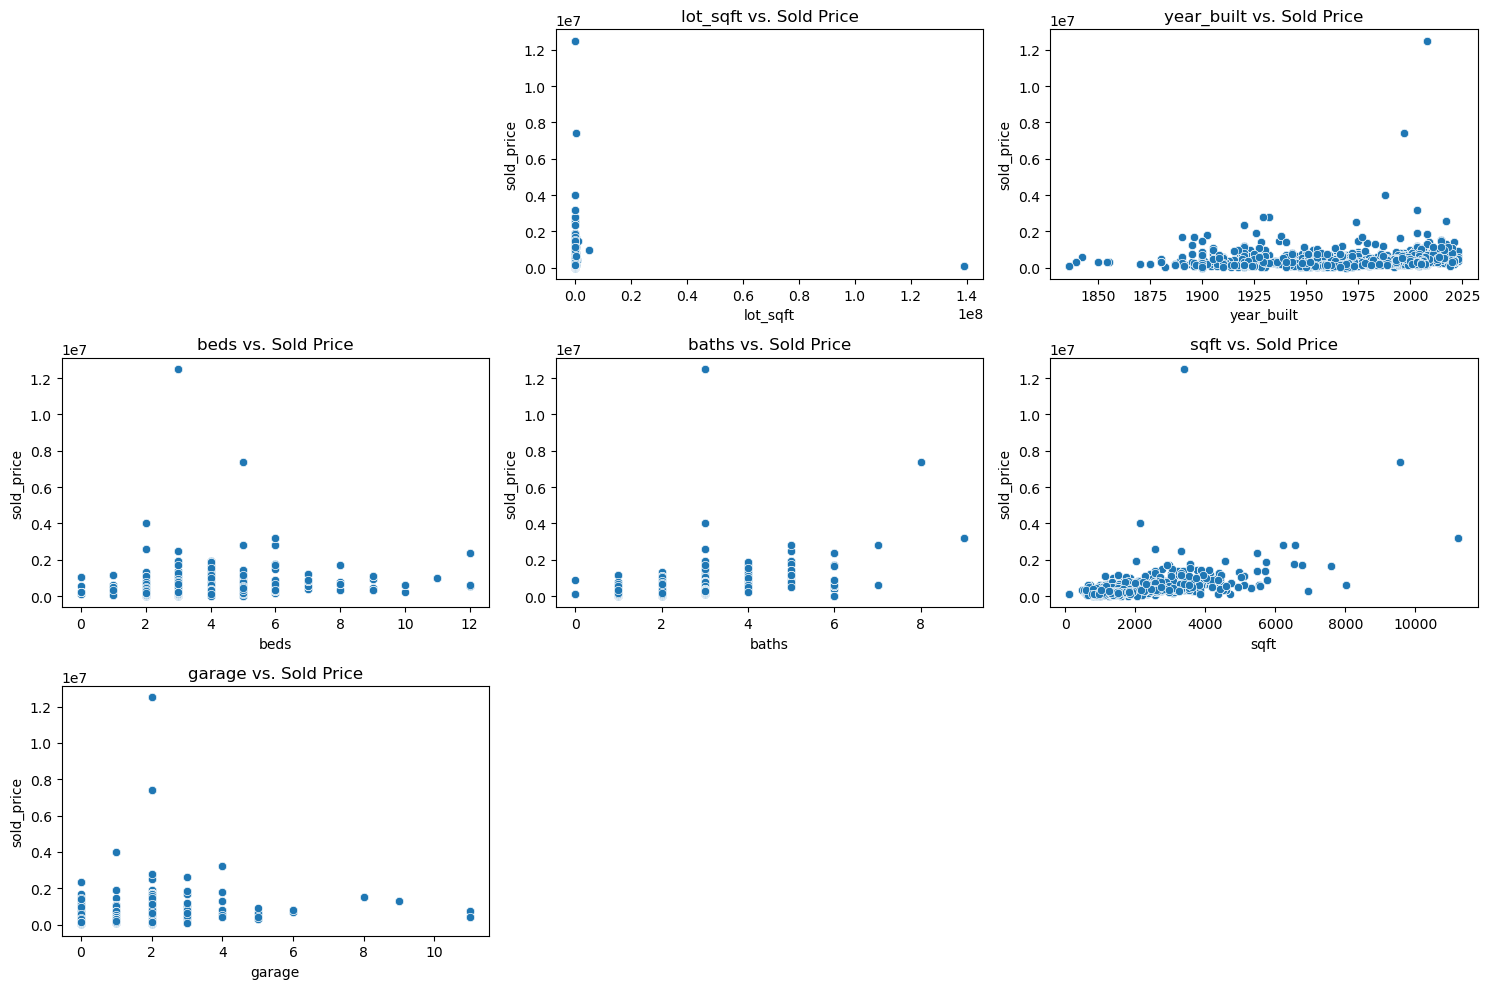

In [ ]:
# Scatter plot of numerical features vs. sold_price
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    if col != "sold_price":  # Skip plotting sold_price vs. sold_price
        plt.subplot(3, 3, i)
        sns.scatterplot(x=df[col], y=df["sold_price"])
        plt.title(f'{col} vs. Sold Price')
        plt.tight_layout()

plt.show()


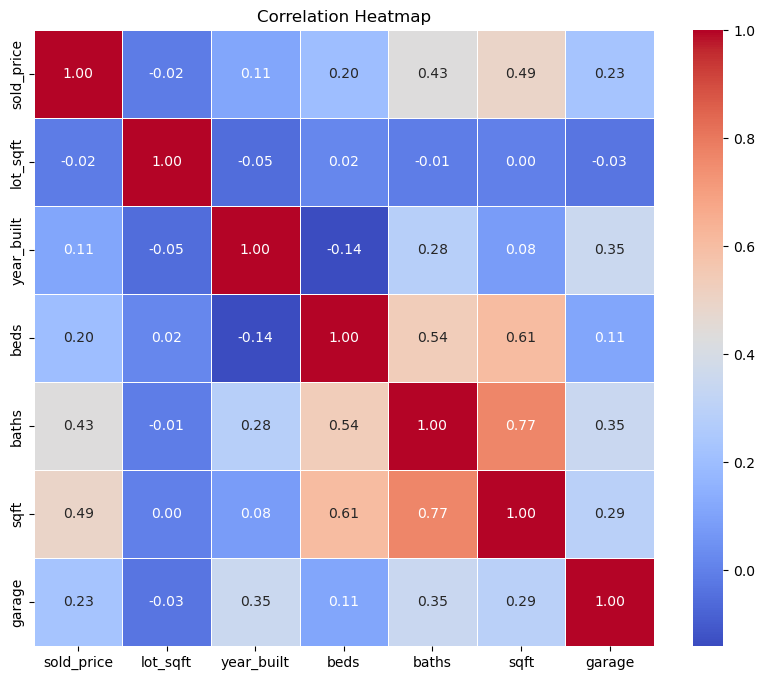

In [ ]:
#Visualizing the Correlation Heatmap

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Checking for Redundant Features

# Get top 5 most correlated feature pairs
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs < 1]  # Exclude self-correlation
print(correlation_pairs.head(10))


sqft        baths         0.765247
baths       sqft          0.765247
beds        sqft          0.605914
sqft        beds          0.605914
baths       beds          0.535231
beds        baths         0.535231
sqft        sold_price    0.492653
sold_price  sqft          0.492653
baths       sold_price    0.432306
sold_price  baths         0.432306
dtype: float64


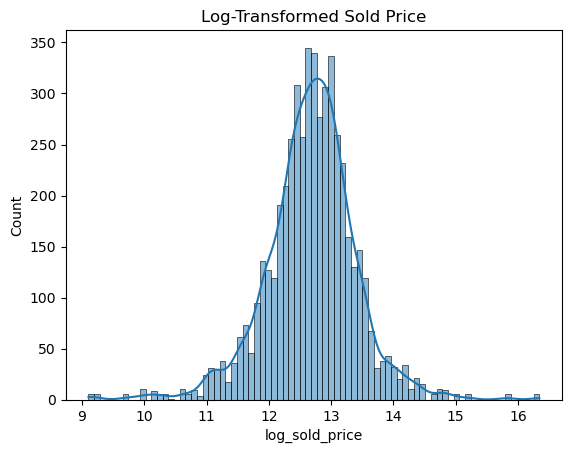

In [ ]:
#Skewness and Transformation

# Apply log transformation to skewed features (e.g., 'sold_price')
df['log_sold_price'] = np.log1p(df['sold_price'])  # log(1 + value) to handle 0 values

# Plot transformed feature
sns.histplot(df['log_sold_price'], kde=True)
plt.title('Log-Transformed Sold Price')
plt.show()

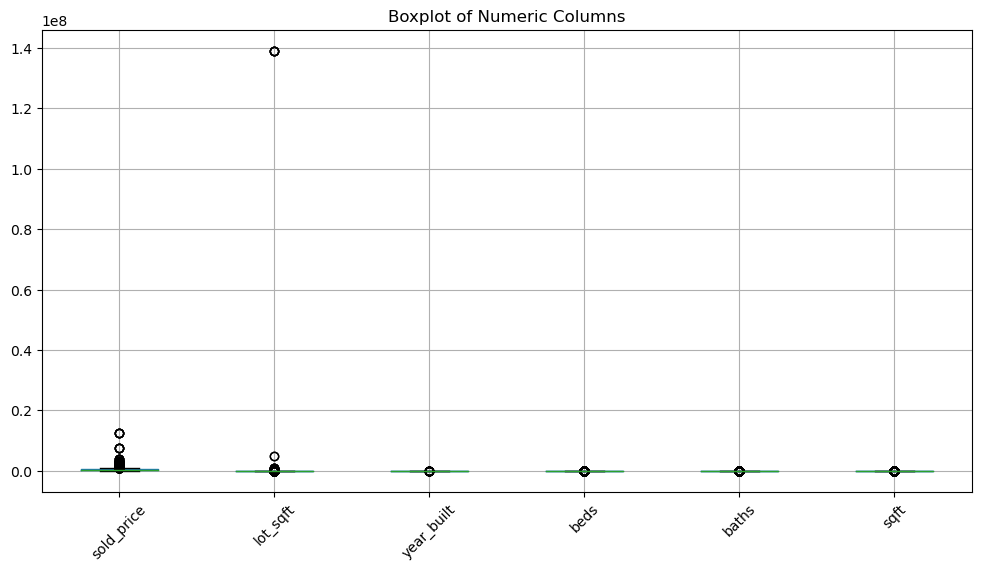

In [ ]:
# Plot boxplots for key numerical variables
num_cols = ["sold_price", "lot_sqft", "year_built", "beds", "baths", "sqft"]
plt.figure(figsize=(12, 6))
df[num_cols].boxplot(rot=45)
plt.title("Boxplot of Numeric Columns")
plt.show()

In [ ]:
#Remove Outliers Using the IQR Method
#The Interquartile Range (IQR) is a common method for filtering out extreme values:

#Calculate Q1 (25th percentile) and Q3 (75th percentile)
#Compute IQR = Q3 - Q1
#Define outliers as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR


# Function to remove outliers based on IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out values outside of bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Apply outlier removal
df_cleaned = remove_outliers_iqr(df, num_cols)

# Print the shape before and after
print(f"Original shape: {df.shape}")
print(f"New shape after outlier removal: {df_cleaned.shape}")

Original shape: (5131, 20)
New shape after outlier removal: (3891, 20)


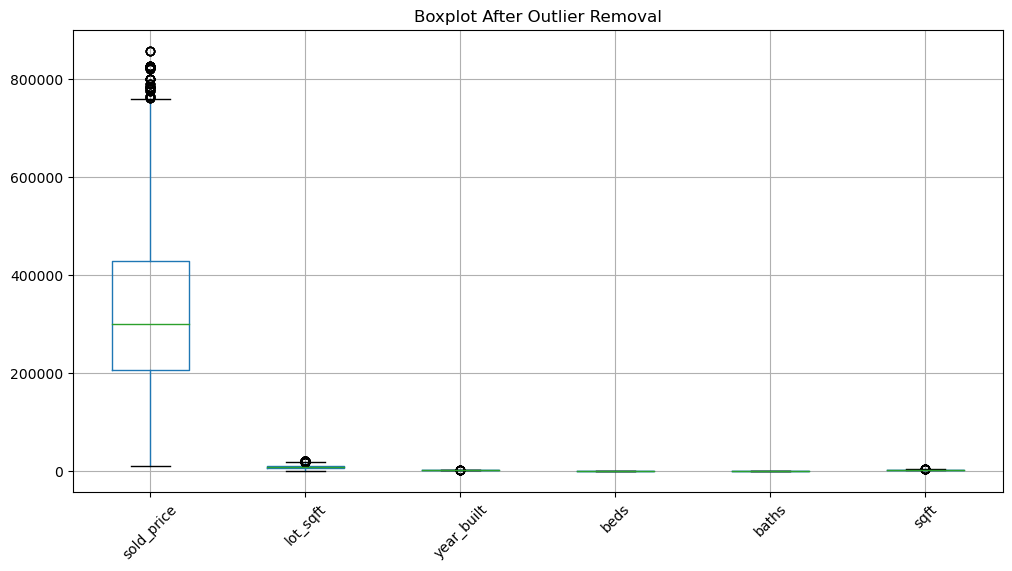

In [ ]:
#Verify the Effect of Outlier Removal

plt.figure(figsize=(12, 6))
df_cleaned[num_cols].boxplot(rot=45)
plt.title("Boxplot After Outlier Removal")
plt.show()

## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized

In [ ]:
#scaling the data to have a mean of 0 and a standard deviation of 1.

from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
num_cols = ["sold_price", "lot_sqft", "year_built", "beds", "baths", "sqft"]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data (scale only the numerical columns)
df[num_cols] = scaler.fit_transform(df[num_cols])

# Check the scaled data
print(df[num_cols].head())

   sold_price  lot_sqft  year_built      beds     baths      sqft
0   -0.141922 -0.030044    0.994194 -0.269604 -0.323918 -0.382045
2   -0.395121 -0.032152    0.128227 -0.269604 -0.323918 -0.784533
3   -0.232350 -0.034645    1.340581 -0.269604  0.640691  0.445025
5   -0.747792 -0.035064   -1.921229  1.325943  3.534519 -0.315764
6   -0.636565 -0.035064   -1.921229  0.528169 -1.288527 -0.392611


In [ ]:
#Split Data into Features and Target

# Separate features (X) and target (y)
X = df.drop(columns=["sold_price"])
y = df["sold_price"]

# Optionally, split the data into training and test sets before saving
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create the Processed Folder and Save Data:

# Create a processed folder if it doesn't exist
processed_folder = './processed'
os.makedirs(processed_folder, exist_ok=True)

# Save the processed data
df.to_csv(os.path.join(processed_folder, 'preprocessed_data.csv'), index=False)

# Optionally, save the split data (X_train, X_test, y_train, y_test)
X_train.to_csv(os.path.join(processed_folder, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(processed_folder, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(processed_folder, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(processed_folder, 'y_test.csv'), index=False)

print("Data saved successfully in the 'processed' folder!")

Data saved successfully in the 'processed' folder!


In [ ]:
# final check

print(os.listdir(processed_folder))

['X_train.csv', 'preprocessed_data.csv', 'y_train.csv', 'y_test.csv', 'X_test.csv']
